<a href="https://colab.research.google.com/github/ethancraycroft/MLA_ETC/blob/main/MLA5_ETC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Learning Assignment 5**
#**ETHAN CRAYCROFT**
#**CS430-ON**
#**Machine Learning in the Cloud**

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [82]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [84]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [85]:
from sklearn import set_config
set_config(display='diagram')

In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

#*Problem 1*

#Load the landsat_train.csv into a data frame named landsat_train and the landsat_test.csv into a dataframe named landsat_test.


In [87]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_test.csv')

#Create bar plots to display the number of land types for landsat_train and landsat_test (two different plots).


In [88]:
land_types_train = landsat_train.land_type.groupby(landsat_train.land_type).count()


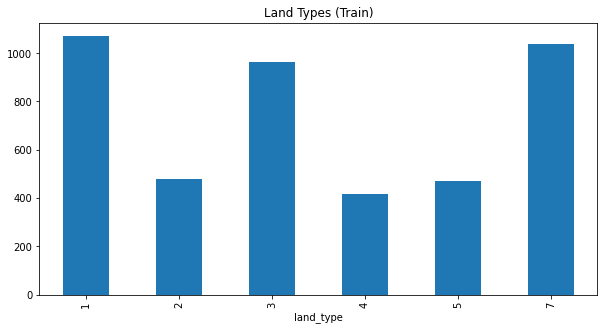

In [89]:
land_types_train.plot(kind='bar', title="Land Types (Train)", figsize=(10, 5))

In [90]:
land_types_test = landsat_test.land_type.groupby(landsat_test.land_type).count()


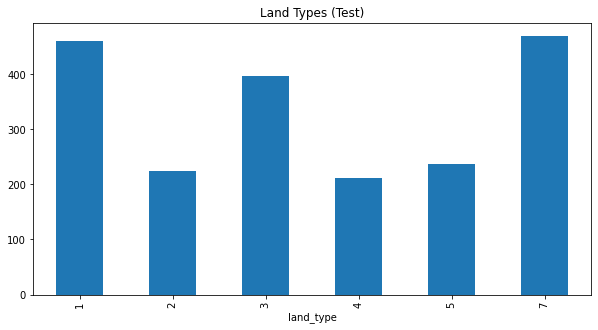

In [91]:
land_types_test.plot(kind='bar', title="Land Types (Test)", figsize=(10, 5))

#Create a data frame called X_train with all columns from landsat_train except for land_type.


In [92]:
X_train = landsat_train.iloc[:,0:-1]

#Create a data frame called X_test with all columns from landsat_test except for land_type.


In [93]:
X_test = landsat_test.iloc[:,0:-1]

#Create a data frame called y_train with the land_type column from landsat_train.


In [94]:
y_train = landsat_train[['land_type']]

#Create a data frame called y_test with the land_type column from landsat_test.

In [95]:
y_test = landsat_test[['land_type']]

#Create a column transformer that will MinMax scale the numerical variables 


In [96]:
num_attributes = ['top_left_r',	'top_left_g',	'top_left_infra1',	'top_left_infra2',	'top_middle_r',	'top_middle_g',	'top_middle_infra1',	'top_middle_infra2',	'top_right_r',	'top_right_g',	'top_right_infra1',	'top_right_infra2',	'middle_left_r',	'middle_left_g',	'middle_left_infra1',	'middle_left_infra2',	'central_pixel_r',	'central_pixel_g',	'central_pixel_infra1',	'central_pixel_infra2',	'middle_right_r',	'middle_right_g',	'middle_right_infra1',	'middle_right_infra2',	'bottom_left_r',	'bottom_left_g',	'bottom_left_infra1',	'bottom_left_infra2',	'bottom_middle_r',	'bottom_middle_g',	'bottom_middle_infra1',	'bottom_middle_infra2',	'bottom_right_r',	'bottom_right_g',	'bottom_right_infra1',	'bottom_right_infra2']
col_transform = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(),num_attributes),]
                  )

#Create a pipeline that will transform the data and then run the RandomForestClassifier algorithm.


In [97]:
random_forest = Pipeline([
                     ('transform', col_transform),
                     ('rf',RandomForestClassifier(n_estimators=1000, max_samples=4000, bootstrap=True, n_jobs=-1))
                     ])

#Run the pipeline to fit the RandomForestClassification model.

In [98]:
random_forest.fit(X_train,np.ravel(y_train))


Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left_infra1',
                                                   'middle_left_in...
                                                   'central_pixel_r',
                                                   'central_pixel_g',
                                                   'central_pixel_infra1',
                                                   'central_pixel_infra2',
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('rf',
                 RandomForestClassifier(max_samples=4000, n_estimators=1000,
                                        n_jobs=-1))])

#Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.


In [99]:
y_pred = random_forest.predict(X_test)

#Use the classification_function to display the precision, recall, and F1 score for each class.


In [100]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.99      0.98      0.99       466
           2       0.98      0.97      0.98       225
           3       0.95      0.89      0.92       424
           4       0.64      0.78      0.70       171
           5       0.90      0.93      0.91       230
           7       0.90      0.87      0.88       484

    accuracy                           0.91      2000
   macro avg       0.89      0.90      0.90      2000
weighted avg       0.92      0.91      0.91      2000



#Use the ConfusionMatrixDisplay function (and associated code) to display a heatmap of the confusion matrix.


In [101]:
classes = random_forest.named_steps.rf.classes_
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

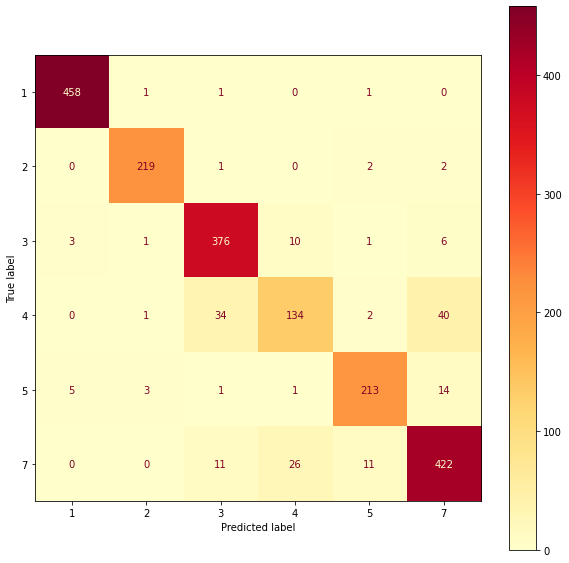

In [102]:
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap='YlOrRd')

#In a Markdown comment, write a conclusion on how suitable you think this model is for predicting the land type.


The results from the random forest model appear to be very successful. Looking at the precision, recall, and F1 scores given from this model, I think it would be a very suitable method for predicting land type. This model seems to struggle a bit with the land type '4', having the lowest precision and recall amongst all the data. However, all of the other land types have excellent precision, recall, and F1 scores. Also by looking at the confusion matrix, you can see this model is very accurate because the darkest boxes follow the diagonal line from top left to bottom right. When the predicted values match the true values in the chart, there is a higher success rate in the model (reflecting the recall, precision, and F1 scores).

#*Problem 2*

In [103]:
knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(max_iter=100000)
svc = SVC(kernel='rbf')

In [104]:
voting = Pipeline([
                     ('transform', col_transform),
                     ('voting_ensemble',VotingClassifier(
                         estimators=[
                                     ('knn',knn),
                                     ('lr',lr),
                                     ('svc',svc)
                                     ], voting='hard'))
                     ])

In [105]:
voting.fit(X_train,np.ravel(y_train))


Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left_infra1',
                                                   'middle_left_in...
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('voting_ensemble',
                 VotingClassifier(estimators=[('knn',
                                               KNeighborsClassifier(n_neighbors=3)),
                                              ('lr',
                                               LogisticRegression(max_iter=100000)),
                                              ('svc', SVC())]))])

In [106]:
y_pred = voting.predict(X_test)


In [107]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       1.00      0.98      0.99       469
           2       0.97      0.97      0.97       223
           3       0.97      0.87      0.91       443
           4       0.55      0.71      0.62       163
           5       0.86      0.91      0.89       223
           7       0.86      0.84      0.85       479

    accuracy                           0.89      2000
   macro avg       0.87      0.88      0.87      2000
weighted avg       0.90      0.89      0.90      2000



In [108]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

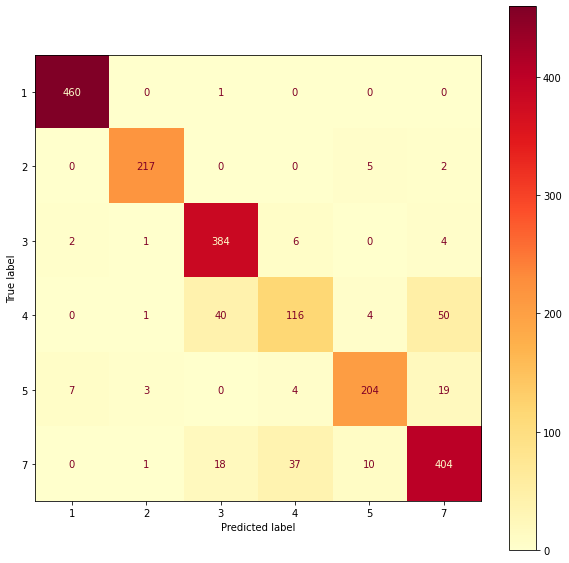

In [109]:
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap='YlOrRd')

#In a Markdown comment, write a conclusion on how suitable you think this model is for predicting the land type.


The voting model had very similar results as the random forest model. This model would be suitable to predict land type, and would do so with pretty good accuracy. Judging by the precision, recall, and F1 scores, this model is (generally speaking) very accurate. Similarly to the random forest model, this model does tend to struggle more with the land type '4'. This land type has the lowest precision and recall scores. Overall, I think this model would be very useful and I would be comfortable using it to predict land type.

#*Problem 3*

In [110]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

In [111]:
X = df[['variance','skewness', 'curtosis', 'entropy']]
X

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [112]:
y = df['forgery']
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: forgery, Length: 1372, dtype: int64

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=7)

In [114]:
num_attributes = ['variance', 'skewness', 'curtosis', 'entropy']
col_transform = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(),num_attributes),]
                  )

In [115]:
random_forest = Pipeline([
                     ('transform', col_transform),
                     ('rf',RandomForestClassifier(n_estimators=1000, max_samples=1000, bootstrap=True, n_jobs=-1))
                     ])

In [116]:
random_forest.fit(X_train,np.ravel(y_train))


Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('rf',
                 RandomForestClassifier(max_samples=1000, n_estimators=1000,
                                        n_jobs=-1))])

In [117]:
y_pred = random_forest.predict(X_test)

In [118]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       159
           1       0.99      1.00      1.00       116

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



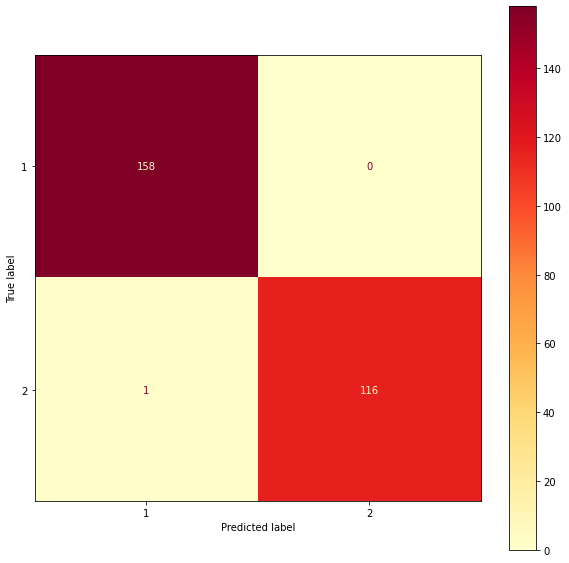

In [119]:
cm1 = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
disp1.plot(ax=ax,cmap='YlOrRd')

#In a Markdown comment, write a conclusion on how suitable you think this model is for predicting forgery.


The random forest model is almost perfect for predicting forgery among bank notes. The precision, recall, and F1 scores are almost all a perfect 1. This shows that the model is excellent at accurately predicting whether or not a bank note was forged. I would feel very comfortable using this model for this prediction.